In [24]:
import pandas as pd                                   #Libraria de analisis de datos
from sklearn.tree import DecisionTreeClassifier       #Para construir un modelo de arbol 
from sklearn.model_selection import train_test_split  #Para dividir los datos iniciales en dos matrices de datos nuevos, una matriz para datos de prueba y otra para datos de entrenamiento
from sklearn.datasets import load_breast_cancer, load_iris


#Para gráficar arbol de decisiones 
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import sklearn.tree as tree
from sklearn import tree
from pydotplus import graph_from_dot_data
from IPython.display import Image
from graphviz import render
from graphviz import Source

In [4]:
#Carga los datos desde el dataset .csv
data = pd.read_csv('covid.csv')

In [5]:
#limpia los datos nulos que se puedan encontrar en el archivo csv
data = data.dropna()

In [6]:
#para comprobar que se ha leido bien, se listan las variables en el fichero
data.dtypes

date            object
country         object
new_cases        int64
new_deaths       int64
total_cases      int64
total_deaths     int64
dtype: object

In [7]:
# se obtienen los estadisticos principales
data.describe()

,new_cases,new_deaths,total_cases,total_deaths
count,7320.000000,7320.000000,7320.000000,7320.000000
mean,80.870355,3.700820,1038.646585,39.678689
std,608.301325,35.347549,7345.777472,348.671247
min,-9.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000
75%,5.000000,0.000000,40.000000,0.000000
max,18695.000000,971.000000,104686.000000,9136.000000


In [8]:
#imprimimos el dataset para reconocer los datos trabajados
data

,date,country,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
7315,2020-03-24,Zimbabwe,0,1,2,1
7316,2020-03-25,Zimbabwe,0,0,2,1
7317,2020-03-26,Zimbabwe,1,0,3,1
7318,2020-03-27,Zimbabwe,0,0,3,1


In [9]:
#Seleccionar las columnas de los datos
X =data.iloc[:,0 :6]
Y =data.iloc[:, -1]

In [12]:
#Convertir variables a numericas
X =pd.get_dummies(X)

In [25]:
#Cargue y devuelva el conjunto de datos del iris ( clasificación ).
iris=load_iris()

In [17]:
#Dividir el conjunto de datos en datos de entrenamiento y datos de pruebas
X_train, X_test, Y_train, Y_test= train_test_split(iris.data,iris.target)


In [18]:
#Creacion del arbol de decision y entrenamiento con el conjunto de datos destinado para ello.
Arbol=DecisionTreeClassifier()



In [19]:

Arbol.fit(X_train,Y_train)


DecisionTreeClassifier()

In [20]:
#Evaluar el modelo con el conjunto de datos de prueba

score=Arbol.score(X_test,Y_test)
print("Accuracy: %.2f%%" %(score*100.0))

Accuracy: 92.11%


In [21]:
score=Arbol.score(X_train,Y_train)
print(score)

1.0


In [22]:
export_graphviz(Arbol,out_file='arbol.dot',class_names=iris.target_names,feature_names=iris.feature_names,filled=True)

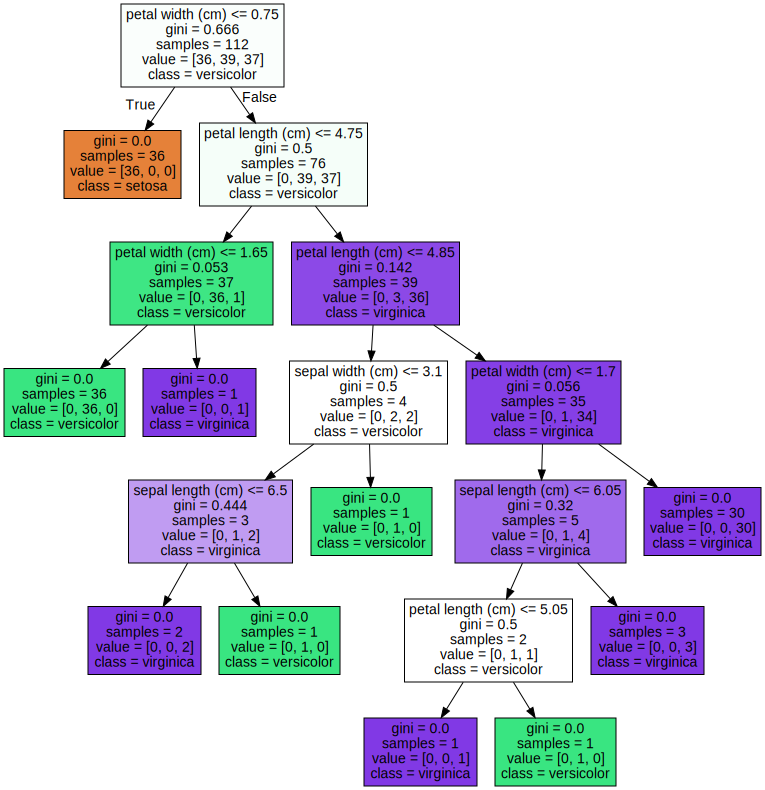

In [ ]:
with open('arbol.dot') as f:
    dot_graph=f.read()
    graph= graphviz.Source(dot_graph)
        
#Convertir .dot a .png
from graphviz import render
render('dot', 'png', 'arbol.dot')    
    
from graphviz import Source
Source.from_file("arbol.dot")